In [1]:
import re
import matplotlib.pyplot as plt

In [4]:
train_error = []
epoch_error = []
val_error = []
val_idx = []
file = open('slurm-12734520.out', 'r') 
Lines = file.readlines() 
epoch_num = 0
count = 0
for line in Lines:
    if 'Epoch:' in line:
        
        new_num = int(re.search('Epoch: \[(\d+)]', line).group(1))
        if not(epoch_num == new_num):
            epoch_error = list(map(float, epoch_error))
            train_error.append((sum(epoch_error)/len(epoch_error)))
            count += 1
         
        #result = re.search('Loss (\d+\.\d+) \((\d+\.\d+)\)', line)
        result = re.search('Error@1 (\d+\.\d+) \((\d+\.\d+)\)', line)
        error = result.group(1)
        epoch_error.append(error)
        #epoch_num = new_num
            
        
    elif 'Validate' in line:
        #result = re.search('Loss (\d+\.\d+) \((\d+\.\d+)\)', line)
        result = re.search('Error@1 (\d+\.\d+)', line)
        error = result.group(1)
        val_error.append(error)
        val_idx.append(count)
        count += 1
epoch_error = list(map(float, epoch_error))
val_error = list(map(float, val_error))

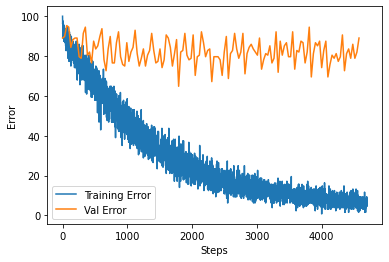

In [5]:
import numpy as np
#train_error = train_error[:len(train_error) - (len(train_error) % 5)]
val_xaxis = list(range(0, len(epoch_error)+2, 32))[:-3]

# print("train:" + str(train_error[-1]))
# print("val:" + str(val_error[-1]))

plt.plot(epoch_error, label='Training Error')
plt.plot(val_xaxis, val_error, label='Val Error')
#plt.ylim(100, min(epoch_error))
plt.xlabel('Steps')
plt.ylabel('Error')
plt.legend()
#plt.show()
plt.savefig('no_aug_error.png')

In [7]:
len(val_error)

144

In [8]:
len(val_xaxis)

147

In [ ]:
len(train_error) % 5

In [ ]:
train_error = train_error[:(len(train_error) - (len(train_error) % 5))]
print(len(train_error))
val_xaxis = list(range(0, len(train_error)+1, 5))
print(len(val_xaxis))

In [ ]:
val_xaxis